In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import geopandas as gpd
import warnings

# ignore all warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('clustered.csv')
df.head()

,LGA,hhsize,totalvehs,hhinc,hhsize_normalised,totalvehs_normalised,hhinc_normalised,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else,label
0,Banyule,2.0,1.0,1125.0,0.166667,0.333333,0.379379,0,0,1,0,1,0,0,0,0,5
1,MorningtonPeninsula,4.0,2.0,0.0,0.500000,0.666667,0.000000,0,0,1,0,1,0,0,0,0,6
2,Whittlesea,4.0,1.0,850.0,0.500000,0.333333,0.274274,0,0,1,0,1,0,0,0,0,4
3,Kingston,4.0,1.0,900.0,0.500000,0.333333,0.300801,0,0,1,0,0,0,1,0,0,4
4,GlenEira,1.0,1.0,1000.0,0.000000,0.333333,0.338839,0,0,0,1,0,1,0,0,0,1


In [26]:
grouped = df.groupby('label')
grouped.mean()


,hhsize,totalvehs,hhinc,hhsize_normalised,totalvehs_normalised,hhinc_normalised,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else
label,,,,,,,,,,,,,,,
0,2.669329,1.309904,1726.218850,0.278222,0.436635,0.494802,0.000000,0.000000,1.0,0.000000,0.000000,0.944089,0.000000,0.046326,0.009585
1,1.965659,1.039835,1870.255495,0.160943,0.346612,0.521888,0.587912,0.160714,0.0,0.251374,0.000000,0.969780,0.000000,0.019231,0.010989
2,2.035613,1.071225,1815.565527,0.172602,0.357075,0.509192,0.366097,0.188034,0.0,0.445869,0.431624,0.000000,0.568376,0.000000,0.000000
3,3.666667,2.023102,2783.085809,0.444444,0.674367,0.738926,0.000000,0.000000,1.0,0.000000,0.438944,0.000000,0.561056,0.000000,0.000000
4,2.413151,0.854839,742.035980,0.235525,0.284946,0.234917,0.000000,0.000000,1.0,0.000000,0.406948,0.000000,0.593052,0.000000,0.000000
5,1.842601,0.757776,2474.487276,0.140434,0.252592,0.683740,0.000000,0.000000,1.0,0.000000,0.445806,0.000000,0.554194,0.000000,0.000000
6,3.949045,2.316348,777.490446,0.491507,0.772116,0.249423,0.000000,0.000000,1.0,0.000000,0.447983,0.000000,0.552017,0.000000,0.000000


In [34]:
ev_label = 3
ev_percentage = round(grouped.size()[ev_label]/df.shape[0]*100,3)
print(f"{ev_percentage}%")
grouped.get_group(ev_label).loc[:, (grouped.get_group(ev_label) != 0).any(axis=0)].mean()

12.12%


hhsize                         3.666667
totalvehs                      2.023102
hhinc                       2783.085809
hhsize_normalised              0.444444
totalvehs_normalised           0.674367
hhinc_normalised               0.738926
dwelltype_Separate House       1.000000
owndwell_Being Purchased       0.438944
owndwell_Fully Owned           0.561056
label                          3.000000
dtype: float64

In [20]:
grouped = df.groupby(['LGA', 'label']).size().reset_index(name='count')

In [8]:
total = df['LGA'].value_counts()
count_df = df.groupby('LGA').apply(lambda x: x['label'].eq(ev_label).sum()).reset_index(name='count')

In [61]:
count_df['total'] = total.values
count_df['percent'] = round(count_df['count'] / count_df['total'], 2)

In [62]:
shapefile_folder = 'LGA_2022_AUST_GDA2020_SHP\LGA_2022_AUST_GDA2020.shp'
australia = gpd.read_file(shapefile_folder)

In [63]:
victoria = australia[australia["STE_NAME21"].str.startswith("V")]
victoria['LGA_NAME22'] = victoria['LGA_NAME22'].str.replace(' ', '')
victoria['LGA_NAME22'] = victoria['LGA_NAME22'].replace(to_replace=r'\(.*?\)', value='', regex=True)
merged_df = victoria.merge(count_df, left_on='LGA_NAME22', right_on='LGA', how='inner')


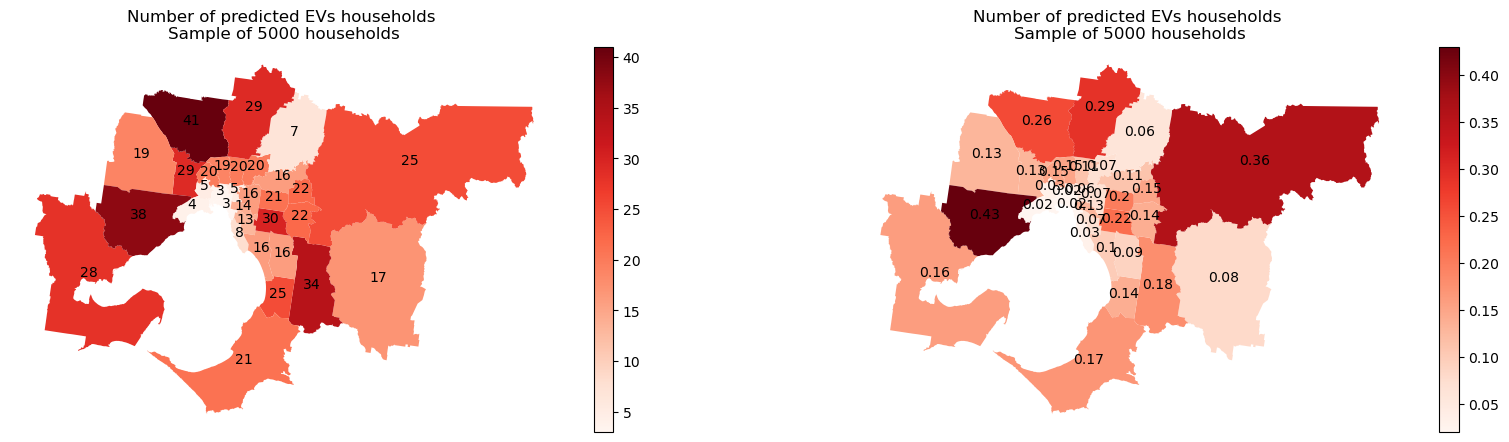

In [72]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

cmap = 'Reds'
merged_df.plot(ax=axs[0], column=merged_df["count"], cmap=cmap, legend=True)
for idx, row in merged_df.iterrows():
    axs[0].annotate(text=row["count"], xy=row["geometry"].centroid.coords[0], ha='center', color='black', fontsize=10)

axs[0].set_title(f'Number of predicted EVs households \nSample of {df.shape[0]} households')
axs[0].axis('off')

merged_df.plot(ax=axs[1], column=merged_df["percent"], cmap=cmap, legend=True)
for idx, row in merged_df.iterrows():
    axs[1].annotate(text=row["percent"], xy=row["geometry"].centroid.coords[0], ha='center', color='black', fontsize=10)

axs[1].set_title(f'Number of predicted EVs households \nSample of {df.shape[0]} households')
axs[1].axis('off')
plt.show()

# map other 
